
# Process the global variogram

In [1]:
# Load Biospytial modules and etc.
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## Use the ggplot style
plt.style.use('ggplot')

In [2]:
from external_plugins.spystats import tools
%run ../testvariogram.py

/opt/conda/envs/biospytial/lib/python2.7/site-packages/IPython/core/pylabtools.py:168: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  safe_execfile(fname,*where,**kw)


In [3]:
%time vg = tools.Variogram(new_data,'residuals1',using_distance_threshold=500000)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 498 µs


In [5]:
### Test creation of chunks
chunks = tools.PartitionDataSet(new_data,namecolumnx='newLon',namecolumny='newLat',n_chunks=3)

In [6]:
map(lambda c : c.shape[0],chunks)

[1541, 13641, 7560, 14099]

In [7]:
vg0 = tools.Variogram(chunks[0],response_variable_name='residuals1',using_distance_threshold=500000)
vg1 = tools.Variogram(chunks[1],response_variable_name='residuals1',using_distance_threshold=500000)
vg2 = tools.Variogram(chunks[2],response_variable_name='residuals1',using_distance_threshold=500000)
vg3 = tools.Variogram(chunks[3],response_variable_name='residuals1',using_distance_threshold=500000)

CPU times: user 26.8 s, sys: 1.34 s, total: 28.2 s
Wall time: 28.2 s


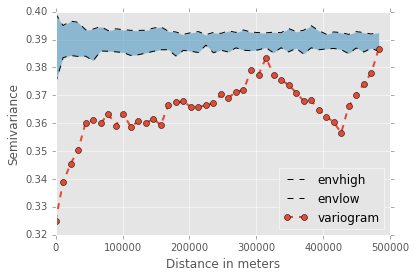

In [8]:
%time vg0.plot(num_iterations=50,with_envelope=True)

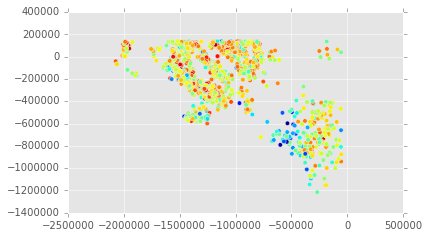

In [ ]:
chunks[0].plot(column='residuals1')

In [ ]:
%time vg1.plot(num_iterations=50,with_envelope=True)

In [ ]:
chunks[1].plot(column='residuals1')

In [ ]:
%time vg2.plot(num_iterations=50,with_envelope=True)

In [ ]:
chunks[2].plot(column='residuals1')

In [ ]:
%time vg3.plot(num_iterations=50,with_envelope=True)

In [ ]:
chunks[3].plot(column='residuals1')